In [36]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [28]:
output=r'F:\DUMP\Data_split'
OUTPUT_DIR = output
test_data_dir = f"{OUTPUT_DIR}/test"
IMG_HEIGHT, IMG_WIDTH = (224, 224)

In [32]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode="categorical")

Found 861 images belonging to 5 classes.


In [33]:
def load_model(path):
    model = keras.models.load_model(path)
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"])
    return model

In [34]:
path=r"C:\Users\GREESHMANTH\Desktop\unittests\model.h5"
model=load_model(path)

In [35]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(test_acc)

861/861 - 115s - loss: 0.0214 - accuracy: 0.9930 - 115s/epoch - 133ms/step
0.99303138256073


In [19]:
word_dict = {0:'Banana',1:'Coconut',2:'Maize',3:'Sugarcane',4:'Wheat'}

In [20]:
def predict(imagePath):
    test_image = image.load_img(imagePath, target_size = (224,224)) 
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(word_dict[np.argmax(result)])
    

In [14]:
imagepath=r"F:\DUMP\maize-prices.jpg"
predict(imagepath)

Maize


Confusion Matrix

In [38]:
# Confusion Matrix
test_labels,test_predicted_labes=[],[]
for i in range(861):
    X,y = test_generator.next()
    y = np.argmax(y, axis=1)
    test_predicted_labes.append(np.argmax(model.predict(X)))
    test_labels.append(y[0])
    print(i,end='\r',flush=True)
# for i in range(861):
#     print(test_labels[i], test_predicted_labes[i])
c_m = confusion_matrix(test_labels,test_predicted_labes)
print(c_m)

4 4
3 3
2 2
2 2
4 4
4 4
4 4
3 3
2 2
2 2
0 0
1 1
0 0
0 0
2 2
3 3
0 0
1 1
4 4
3 3
4 4
1 1
4 4
4 4
4 4
0 0
3 3
2 2
2 2
1 1
4 4
4 4
2 2
2 2
4 4
4 4
1 1
3 3
2 2
2 2
2 2
0 0
4 4
2 2
2 2
0 0
4 4
2 2
4 4
0 0
0 0
0 0
1 1
2 2
0 0
4 4
3 3
0 0
3 3
1 1
4 4
2 2
4 4
2 2
4 4
3 3
4 4
4 4
4 4
1 1
0 0
4 4
2 2
2 2
0 0
0 0
4 4
4 4
4 4
1 1
3 3
0 0
1 1
0 0
0 0
0 0
2 2
4 4
4 4
1 1
1 1
4 4
2 2
0 0
1 1
1 1
2 2
3 3
3 3
4 4
0 0
1 1
2 2
2 2
1 1
4 4
3 3
2 2
1 1
0 0
3 3
0 0
2 2
4 4
1 1
3 3
4 4
3 3
2 2
4 4
4 4
3 3
2 2
3 3
0 0
2 2
4 4
2 2
4 4
2 2
4 4
2 2
3 3
0 0
1 1
4 4
0 0
1 1
0 0
4 4
0 0
3 3
0 0
0 0
0 0
0 0
0 0
1 1
1 1
3 3
4 4
4 4
2 2
4 4
2 2
4 4
0 0
4 4
2 2
2 2
1 1
0 0
3 3
4 4
2 2
3 3
3 3
2 2
3 3
1 1
4 4
2 2
2 2
2 2
2 2
2 2
3 3
4 4
2 2
3 3
4 4
4 4
2 2
3 3
4 4
4 4
4 4
4 4
0 0
4 4
4 4
2 2
4 4
3 3
4 4
2 2
3 3
2 2
2 2
3 3
1 1
0 0
0 0
3 3
2 2
3 3
4 4
4 4
4 4
1 1
1 1
2 2
2 2
4 4
1 1
3 3
1 1
1 1
4 4
3 3
2 2
1 1
2 2
1 1
4 4
2 2
2 2
3 3
3 3
3 3
3 3
4 4
4 4
4 4
2 2
1 1
3 3
1 1
2 2
3 2
4 4
1 1
4 4
3 3
4 4
2 2
2 2
0 0
4 4
3 3


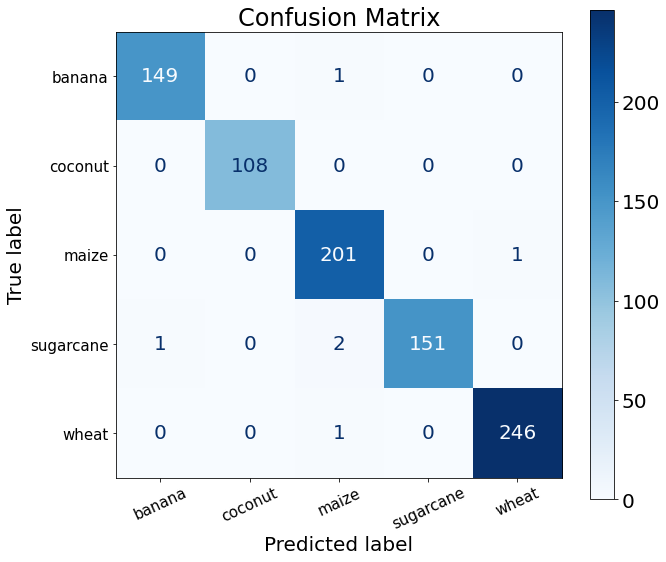

In [39]:
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=test_generator.class_indices)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)
# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

F1-Score

In [40]:
f1_score(test_labels,test_predicted_labes, average=None)

array([0.99333333, 1.        , 0.98771499, 0.99016393, 0.99595142])

In [41]:
print(classification_report(test_labels,test_predicted_labes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       1.00      1.00      1.00       108
           2       0.98      1.00      0.99       202
           3       1.00      0.98      0.99       154
           4       1.00      1.00      1.00       247

    accuracy                           0.99       861
   macro avg       0.99      0.99      0.99       861
weighted avg       0.99      0.99      0.99       861

